## OCOM5300M Artificial Intelligence Project – Experiments

This notebook compares multiple Large Language Model (LLM) strategies—Vanilla, Retrieval-Augmented Generation (RAG), and Cache-Augmented Generation (CAG)—using OpenAI (GPT) and Google Gemini to evaluate sales engineering demo transcripts.

Evaluation is guided primarily by the RAGAS framework, focusing on:

- Faithfulness  
- Context Precision (Compare human evaluation)
- Semantic_similarity


Additional metrics are evaluated using custom logic:

- Consistency  
- Latency  
- Score dif (Compare human evaluation)
- Cost (estimated via token tracking)


The notebook includes the following model variants:

1. Vanilla GPT (no retrieval)  
2. GPT with naive RAG approach  
3. GPT with advanced RAG retrieval  
4. Gemini with advanced RAG retrieval  
5. Gemini with CAG approach

Additional variants and analyses may be added in later cells.



In this notebook we have the consolidation of the multiple runs for 5 different transcripts.

In [10]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the folder path (current directory)
folder_path = "."

# find all matching CSV files
csv_files = glob.glob(os.path.join(folder_path, "transcript*_output.csv"))

# Load and concatenate all CSVs into a single DataFrame
eval_log_all = [pd.read_csv(file) for file in csv_files]
eval_log = pd.concat(eval_log_all, ignore_index=True)

eval_log


,model_variant,model_name,output_type,transcript_name,context_precision,faithfulness,semantic_similarity,score_diff,consistency,latency,input_tokens,cached_input_tokens,input_token_price_M,cached_input_token_price_M,output_tokens,output_token_price_M,cost_usd
0,GPT Vanilla,gpt-4o,explanation,anonymized call 04.txt,0.2000,0.1133,0.8493,0.400,0.0000,7.82,5549.0,NaN,2.500,NaN,295.8,10.0,0.016830
1,GPT Vanilla,gpt-4o,feedback,anonymized call 04.txt,0.6500,0.3910,NaN,NaN,NaN,21.40,128.0,NaN,2.500,NaN,166.6,10.0,0.001986
2,GPT Naive RAG,gpt-4o,explanation,anonymized call 04.txt,0.4805,0.8550,0.8106,0.484,0.0120,52.24,47965.8,NaN,2.500,NaN,1813.5,10.0,0.138049
3,GPT Naive RAG,gpt-4o,feedback,anonymized call 04.txt,0.8000,0.8592,NaN,NaN,NaN,25.48,5371.0,NaN,2.500,NaN,861.0,10.0,0.022038
4,GPT Advanced RAG,gpt-4o,explanation,anonymized call 04.txt,0.6781,0.8333,0.8156,0.456,0.0742,104.75,51817.1,NaN,2.500,NaN,1826.9,10.0,0.147812
5,GPT Advanced RAG,gpt-4o,feedback,anonymized call 04.txt,0.8333,0.7929,NaN,NaN,NaN,36.66,5565.0,NaN,2.500,NaN,890.0,10.0,0.022812
6,Gemini Advanced RAG,gemini-1.5-flash-002,explanation,anonymized call 04.txt,0.2733,0.5200,0.8171,0.988,0.0440,61.69,57278.4,NaN,0.075,NaN,2657.5,0.3,0.004296
7,Gemini Advanced RAG,gemini-1.5-flash-002,feedback,anonymized call 04.txt,0.9000,0.4688,NaN,NaN,NaN,11.72,5866.0,NaN,0.075,NaN,990.0,0.3,0.000440
8,Gemini CAG,gemini-1.5-flash-002,explanation,anonymized call 04.txt,1.0000,0.9070,0.8155,1.128,0.0349,93.47,31946.6,724870.0,0.075,0.01875,2786.8,0.3,0.002396
9,Gemini CAG,gemini-1.5-flash-002,feedback,anonymized call 04.txt,1.0000,0.9091,NaN,NaN,NaN,43.68,1107.0,362435.0,0.075,0.01875,938.0,0.3,0.002396


In [19]:

# Group by the three columns and calculate the mean for numeric fields
avg_eval_log = eval_log.groupby(['model_variant', 'model_name', 'output_type'], as_index=False).mean(numeric_only=True)
avg_eval_log

,model_variant,model_name,output_type,context_precision,faithfulness,semantic_similarity,score_diff,consistency,latency,input_tokens,cached_input_tokens,input_token_price_M,cached_input_token_price_M,output_tokens,output_token_price_M,cost_usd
0,GPT Advanced RAG,gpt-4o,explanation,0.54000,0.69690,0.81384,0.7492,0.07164,114.866,64544.86,NaN,2.500,NaN,1977.86,10.0,0.181141
1,GPT Advanced RAG,gpt-4o,feedback,0.84334,0.77874,NaN,NaN,NaN,36.318,5184.20,NaN,2.500,NaN,883.80,10.0,0.021798
2,GPT Naive RAG,gpt-4o,explanation,0.43052,0.74692,0.81608,0.7976,0.02582,53.182,59873.20,NaN,2.500,NaN,1900.08,10.0,0.168684
3,GPT Naive RAG,gpt-4o,feedback,0.91000,0.75354,NaN,NaN,NaN,27.158,5174.80,NaN,2.500,NaN,878.80,10.0,0.021725
4,GPT Vanilla,gpt-4o,explanation,0.15668,0.11000,0.84416,0.5280,0.07018,6.898,7914.20,NaN,2.500,NaN,299.82,10.0,0.022783
5,GPT Vanilla,gpt-4o,feedback,0.56668,0.37346,NaN,NaN,NaN,21.774,130.60,NaN,2.500,NaN,164.64,10.0,0.001973
6,Gemini Advanced RAG,gemini-1.5-flash-002,explanation,0.28062,0.30570,0.83194,0.9888,0.05744,57.930,70615.34,NaN,0.075,NaN,2668.98,0.3,0.005296
7,Gemini Advanced RAG,gemini-1.5-flash-002,feedback,0.86332,0.37730,NaN,NaN,NaN,11.716,5458.00,NaN,0.075,NaN,988.60,0.3,0.000409
8,Gemini CAG,gemini-1.5-flash-002,explanation,1.00000,0.72344,0.83574,0.9808,0.03956,78.228,45121.12,724870.0,0.075,0.01875,2805.42,0.3,0.003384
9,Gemini CAG,gemini-1.5-flash-002,feedback,0.96000,0.97276,NaN,NaN,NaN,30.272,1111.80,362435.0,0.075,0.01875,950.60,0.3,0.003384


In [20]:
desired_order = [
    "GPT Vanilla",
    "GPT Naive RAG",
    "GPT Advanced RAG",
    "Gemini Advanced RAG",
    "Gemini CAG"
]


avg_eval_log["model_variant"] = pd.Categorical(avg_eval_log["model_variant"],categories=desired_order,ordered=True)


avg_eval_log = avg_eval_log.sort_values("model_variant")
avg_eval_log

,model_variant,model_name,output_type,context_precision,faithfulness,semantic_similarity,score_diff,consistency,latency,input_tokens,cached_input_tokens,input_token_price_M,cached_input_token_price_M,output_tokens,output_token_price_M,cost_usd
4,GPT Vanilla,gpt-4o,explanation,0.15668,0.11000,0.84416,0.5280,0.07018,6.898,7914.20,NaN,2.500,NaN,299.82,10.0,0.022783
5,GPT Vanilla,gpt-4o,feedback,0.56668,0.37346,NaN,NaN,NaN,21.774,130.60,NaN,2.500,NaN,164.64,10.0,0.001973
2,GPT Naive RAG,gpt-4o,explanation,0.43052,0.74692,0.81608,0.7976,0.02582,53.182,59873.20,NaN,2.500,NaN,1900.08,10.0,0.168684
3,GPT Naive RAG,gpt-4o,feedback,0.91000,0.75354,NaN,NaN,NaN,27.158,5174.80,NaN,2.500,NaN,878.80,10.0,0.021725
0,GPT Advanced RAG,gpt-4o,explanation,0.54000,0.69690,0.81384,0.7492,0.07164,114.866,64544.86,NaN,2.500,NaN,1977.86,10.0,0.181141
1,GPT Advanced RAG,gpt-4o,feedback,0.84334,0.77874,NaN,NaN,NaN,36.318,5184.20,NaN,2.500,NaN,883.80,10.0,0.021798
6,Gemini Advanced RAG,gemini-1.5-flash-002,explanation,0.28062,0.30570,0.83194,0.9888,0.05744,57.930,70615.34,NaN,0.075,NaN,2668.98,0.3,0.005296
7,Gemini Advanced RAG,gemini-1.5-flash-002,feedback,0.86332,0.37730,NaN,NaN,NaN,11.716,5458.00,NaN,0.075,NaN,988.60,0.3,0.000409
8,Gemini CAG,gemini-1.5-flash-002,explanation,1.00000,0.72344,0.83574,0.9808,0.03956,78.228,45121.12,724870.0,0.075,0.01875,2805.42,0.3,0.003384
9,Gemini CAG,gemini-1.5-flash-002,feedback,0.96000,0.97276,NaN,NaN,NaN,30.272,1111.80,362435.0,0.075,0.01875,950.60,0.3,0.003384


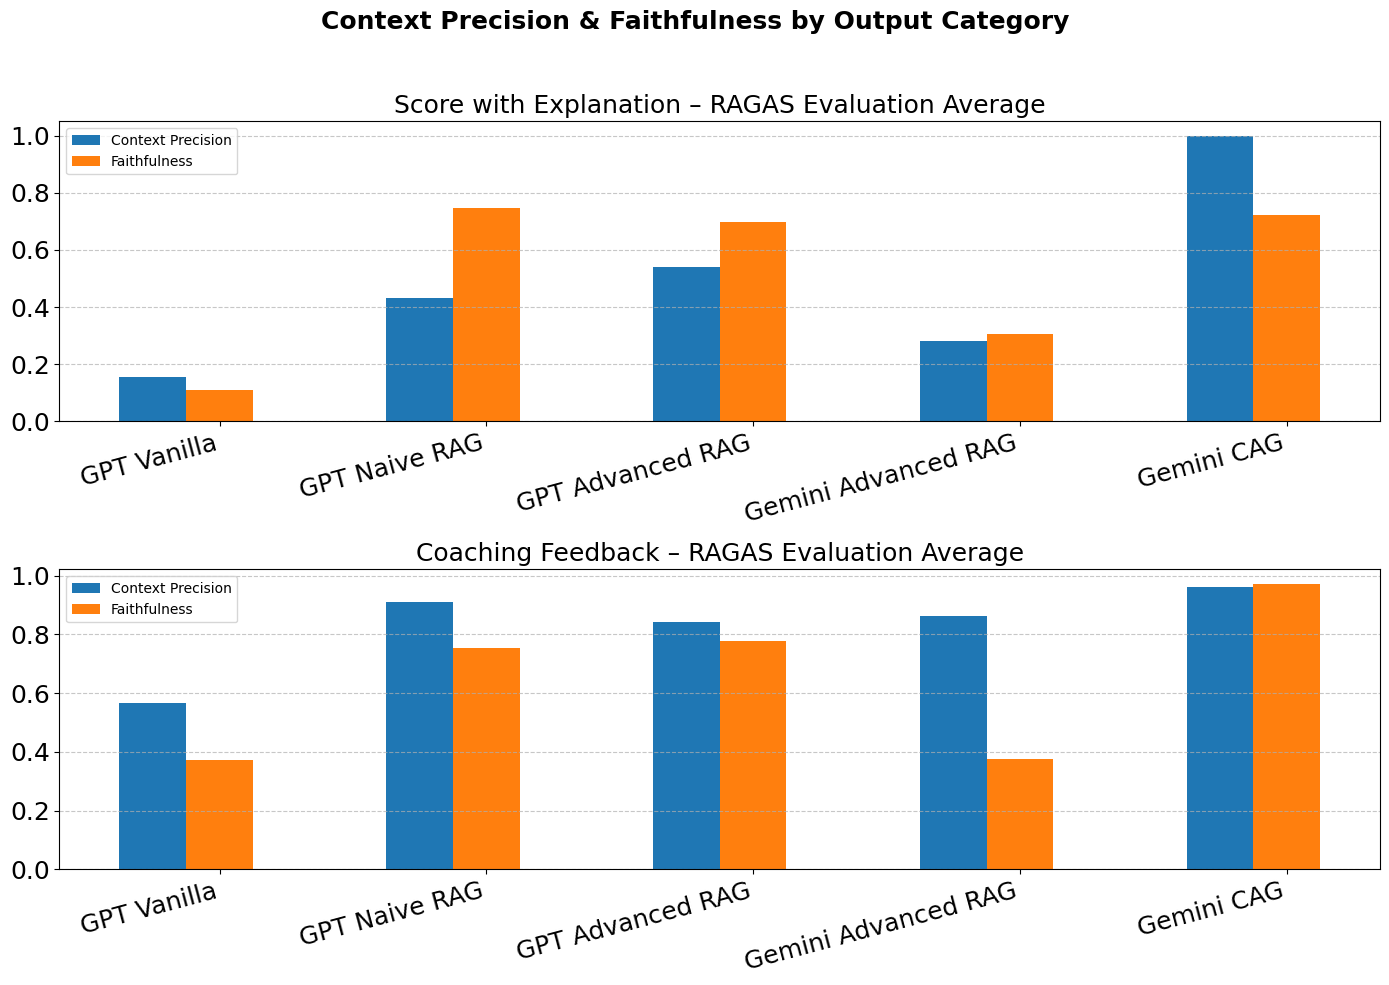

In [28]:
# Charts by average
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
output_types = ["explanation", "feedback"]
grouped_metrics = ["context_precision", "faithfulness"]
grouped_titles = ["Context Precision", "Faithfulness"]
width = 0.25

for row_idx, output_type in enumerate(output_types):
    subset = avg_eval_log[avg_eval_log["output_type"] == output_type]
    model_labels = subset["model_variant"].tolist()
    x = np.arange(len(model_labels))
    grouped_values = [subset[m].fillna(0).tolist() for m in grouped_metrics]
    
    ax = axs[row_idx]
    for i, values in enumerate(grouped_values):
        ax.bar(x + i * width, values, width, label=grouped_titles[i])
    
    if output_type == "explanation":
        ax.set_title(f"Score with {output_type.capitalize()} – RAGAS Evaluation Average", fontsize=18)
    else:
        ax.set_title(f"Coaching {output_type.capitalize()} – RAGAS Evaluation Average", fontsize=18)
    #ax.set_ylabel("Score")
    ax.set_xticks(x + width)
    ax.set_xticklabels(model_labels, rotation=15, ha="right", fontsize=18)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='y', labelsize=18)

plt.suptitle("Context Precision & Faithfulness by Output Category", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


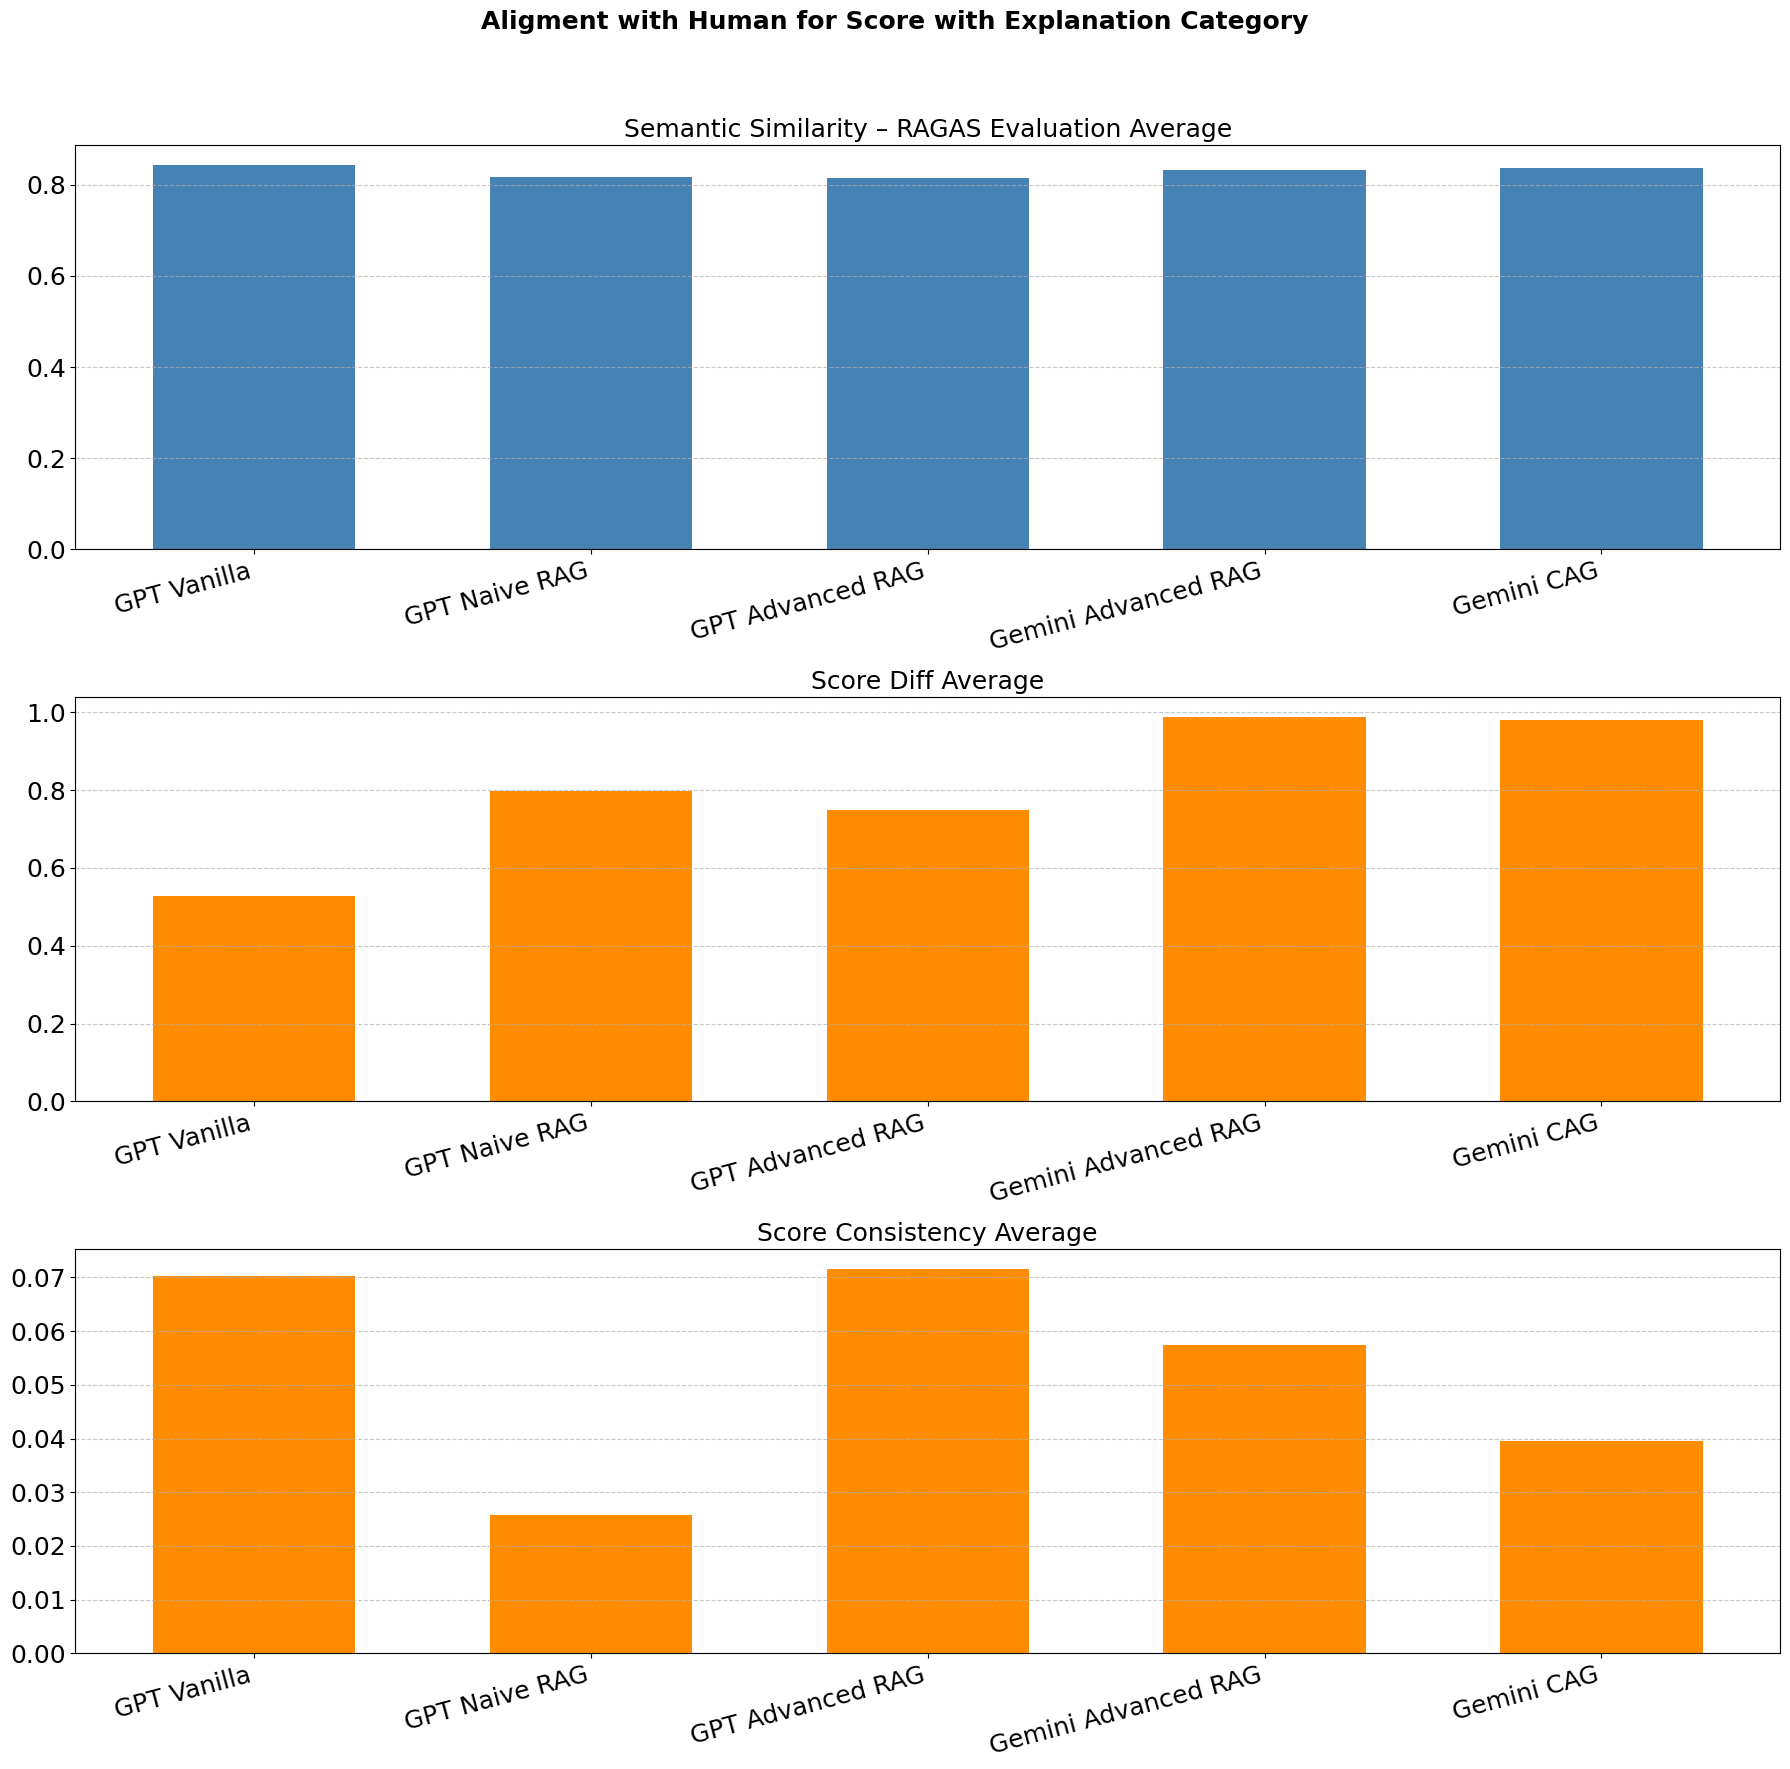

In [30]:

# Explanation-only subset
subset = avg_eval_log[avg_eval_log["output_type"] == "explanation"]
model_labels = subset["model_variant"].tolist()
x = np.arange(len(model_labels))
width = 0.6

# Metrics to display
metrics = [
    ("semantic_similarity", "Semantic Similarity"),
    ("score_diff", "Score Diff Average"),
    ("consistency", "Score Consistency Average")
]

fig, axs = plt.subplots(3, 1, figsize=(18, 18))

for i, (metric, title) in enumerate(metrics):
    ax = axs[i]
    values = subset[metric].fillna(0).tolist()
    
    ax.bar(x, values, width, color="steelblue")
    if title == "Semantic Similarity":
        ax.set_title(f"{title} – RAGAS Evaluation Average", fontsize=18)
        ax.bar(x, values, width, color="steelblue")
    else:
        ax.bar(x, values, width, color="darkorange")
        ax.set_title(title, fontsize=18)
    #ax.set_ylabel("Score")
    ax.set_xticks(x)
    ax.set_xticklabels(model_labels, rotation=15, ha="right", fontsize = 18)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='y', labelsize=18)

plt.suptitle("Aligment with Human for Score with Explanation Category", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

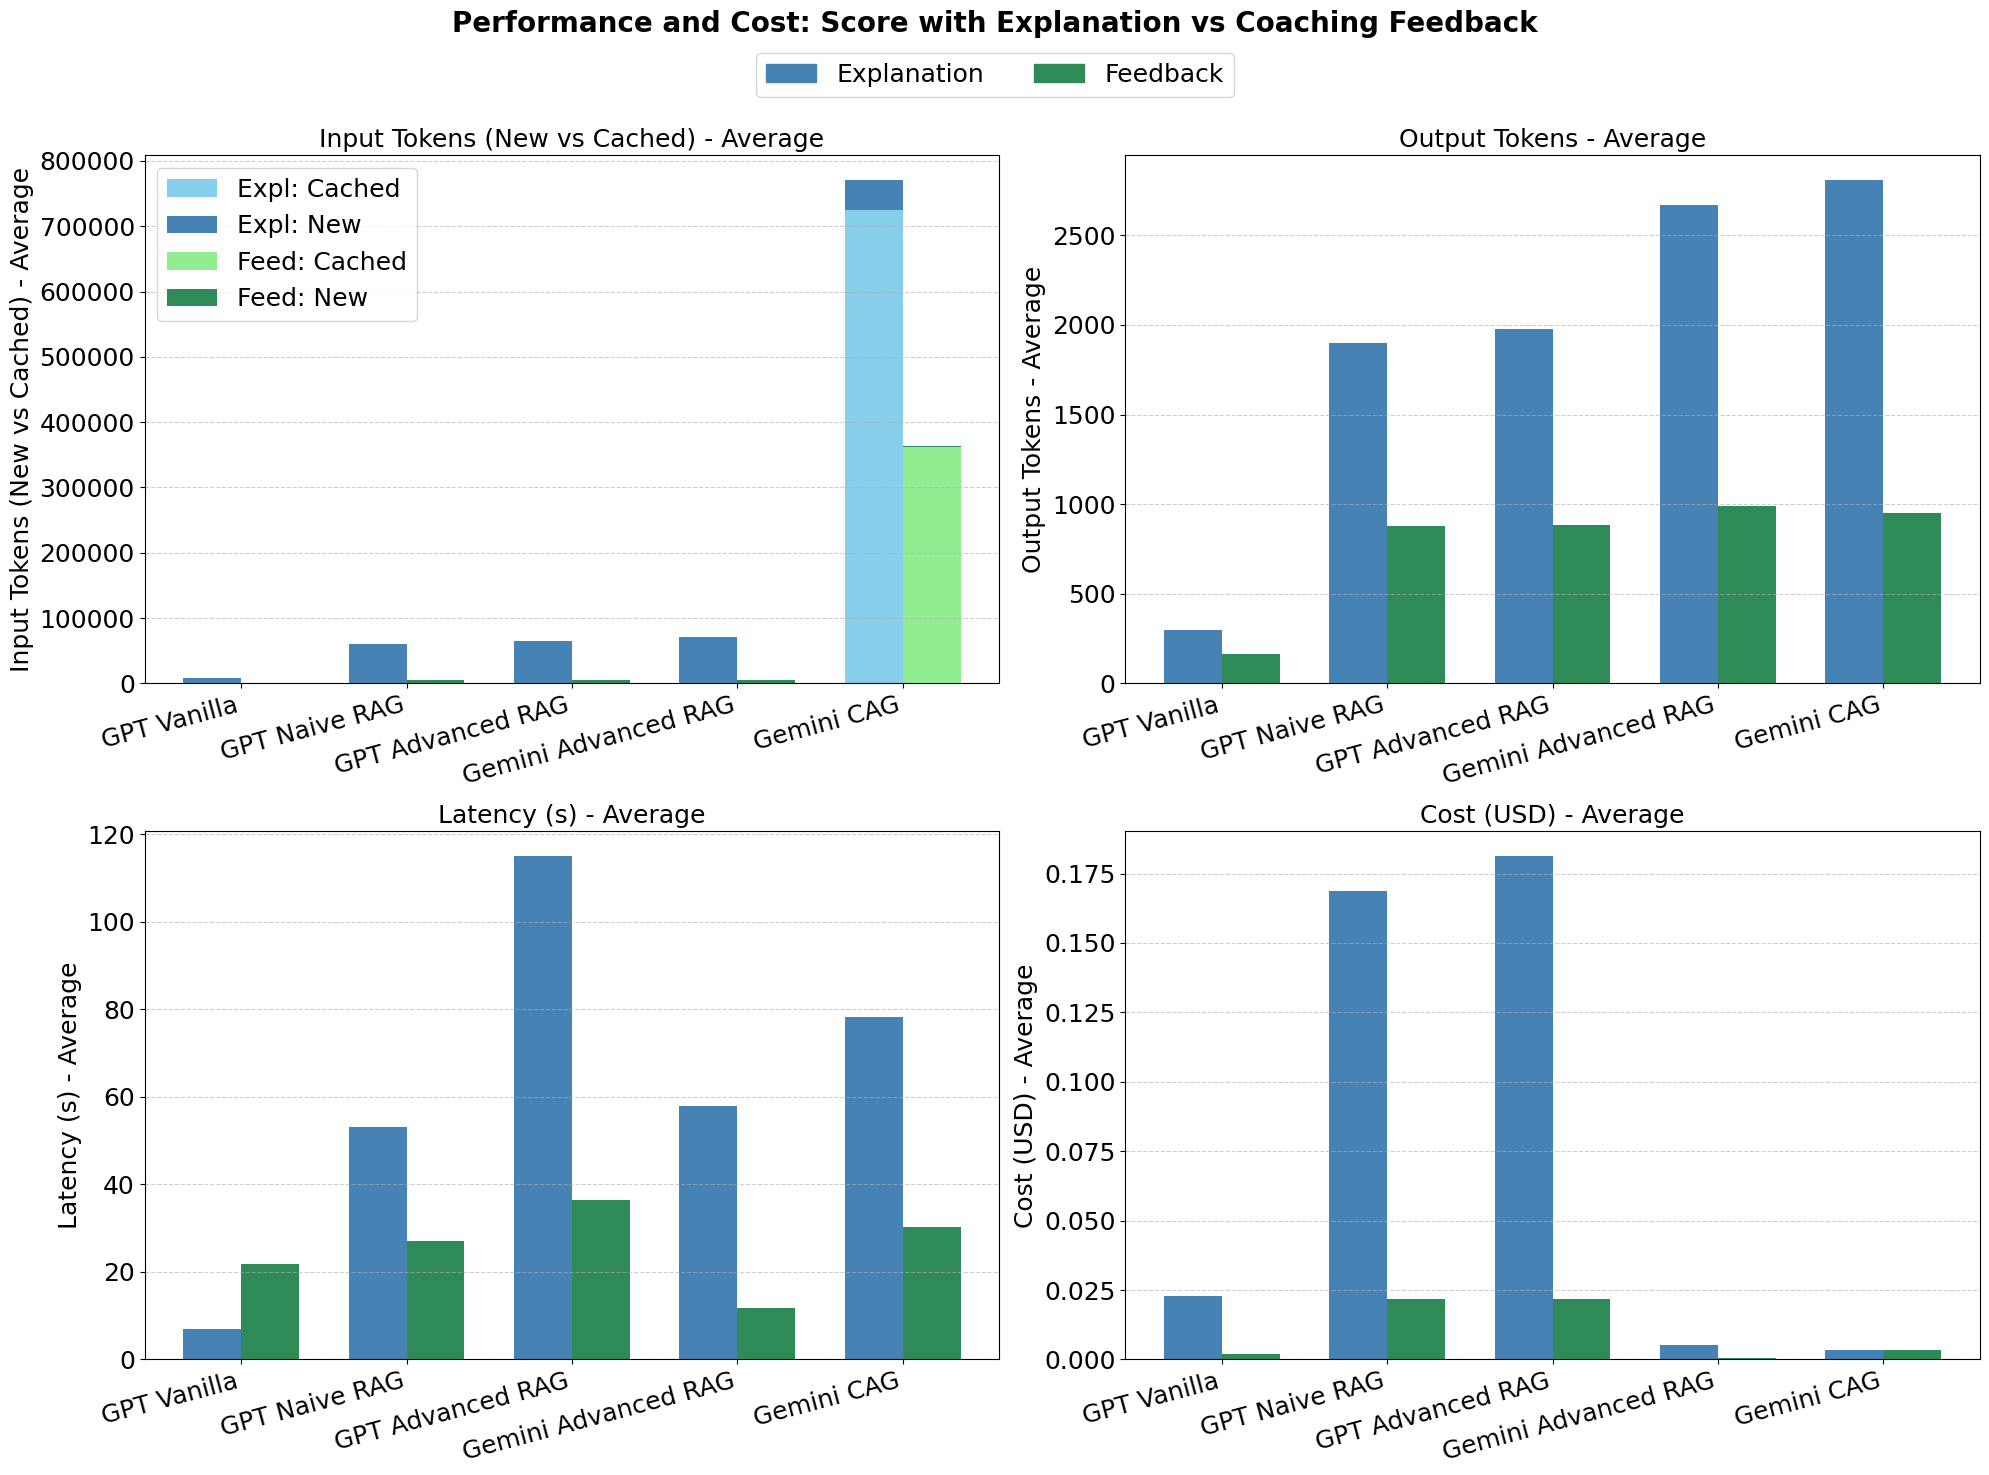

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Metrics to compare: (column_name, display_title)
metrics = [
    ("input_tokens", "Input Tokens (New vs Cached) - Average"),
    ("output_tokens", "Output Tokens - Average"),
    ("latency", "Latency (s) - Average"),
    ("cost_usd", "Cost (USD) - Average"),
]

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()
width = 0.35

# Colors
colors = {
    "expl": "steelblue",
    "feed": "seagreen",
    "expl_cached": "skyblue",
    "feed_cached": "lightgreen"
}

# Model variants (assumes same order in both explanation and feedback)
explanation = avg_eval_log[avg_eval_log["output_type"] == "explanation"]
feedback = avg_eval_log[avg_eval_log["output_type"] == "feedback"]
models = explanation["model_variant"].tolist()
x = np.arange(len(models))

for i, (metric, title) in enumerate(metrics):
    ax = axs[i]

    if metric == "input_tokens":
        # Stacked bar comparison
        new_expl = explanation["input_tokens"].fillna(0)
        cached_expl = explanation["cached_input_tokens"].fillna(0)
        new_feed = feedback["input_tokens"].fillna(0)
        cached_feed = feedback["cached_input_tokens"].fillna(0)

        ax.bar(x - width/2, cached_expl, width, label='Expl: Cached', color=colors["expl_cached"])
        ax.bar(x - width/2, new_expl, width, bottom=cached_expl, label='Expl: New', color=colors["expl"])

        ax.bar(x + width/2, cached_feed, width, label='Feed: Cached', color=colors["feed_cached"])
        ax.bar(x + width/2, new_feed, width, bottom=cached_feed, label='Feed: New', color=colors["feed"])

        # Only this chart gets its own legend
        ax.legend(loc='upper left', fontsize=18)
    else:
        expl_vals = explanation[metric].fillna(0)
        feed_vals = feedback[metric].fillna(0)

        ax.bar(x - width/2, expl_vals, width, color=colors["expl"])
        ax.bar(x + width/2, feed_vals, width, color=colors["feed"])

    ax.set_title(title, fontsize=18)
    ax.set_ylabel(title, fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=15, ha="right", fontsize=18)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.tick_params(axis='y', labelsize=18)

# Global title
plt.suptitle("Performance and Cost: Score with Explanation vs Coaching Feedback", fontsize=20, weight='bold')

# Global legend (added below the title, outside subplots)
handles = [
    Patch(color=colors["expl"], label="Explanation"),
    Patch(color=colors["feed"], label="Feedback")
]
fig.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, 0.96), ncol=2, fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()
